In [171]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal
import scipy
import pandas as pd
import ipywidgets
from IPython.display import display


def LockInX_ds(ds):
    s1_len = ds.loc[ds['SWL'] == 3].index[1]
    x = ds['s1'].values[:s1_len]
    y = ds['s2'].values[::s1_len]

    """ Check if back and forth """
    if len(np.unique(x)) == s1_len:
        z = np.reshape(ds['HP334xx [V]'].values, (len(y), len(x)))

    else :
        x_len = len(x)//2
        x = x[:x_len]
        
        z = np.array([ds['HP334xx [V]'].values[x_len*n:x_len*(n+1)] for n in range(len(ds)//x_len) if n % 2 == 0])
        z_back = np.array([ds['HP334xx [V]'].values[x_len*n:x_len*(n+1)] for n in range(len(ds)//x_len) if n % 2 != 0])

    return x,y,z



def plot_2d(z, x, y):

    fig, main_ax = plt.subplots(figsize=(5, 5))
    divider = make_axes_locatable(main_ax)
    top_ax = divider.append_axes("top", 1.05, pad=0.1, sharex=main_ax)
    right_ax = divider.append_axes("right", 1.05, pad=0.1, sharey=main_ax)
    top_ax.xaxis.set_tick_params(labelbottom=False)
    right_ax.yaxis.set_tick_params(labelleft=False)

    main_ax.set(xlabel='s1', ylabel='s2')
    cax = main_ax.imshow(z, origin='lower', cmap='RdBu', aspect='auto')

    main_ax.autoscale(enable=True)
    right_ax.autoscale(enable=True)
    top_ax.autoscale(enable=True)
    v_line = main_ax.axvline(np.nan, color='C0')
    h_line = main_ax.axhline(np.nan, color='C1')
    v_prof, = right_ax.plot(z[:,0],np.arange(len(y)), 'C0')
    h_prof, = top_ax.plot(np.arange(len(x)), z[0,:], 'C1')

    def on_move(event):
        if event.inaxes is main_ax:
            cur_x = event.xdata
            cur_y = event.ydata
            v_line.set_xdata([cur_x,cur_x])
            h_line.set_ydata([cur_y,cur_y])
            v_prof.set_xdata(z[:,int(cur_x)])
            h_prof.set_ydata(z[int(cur_y),:])
            right_ax.relim()
            right_ax.autoscale_view()
            top_ax.relim()
            top_ax.autoscale_view()

            fig.canvas.draw_idle()

    """ vmin vmax """
    def update_vlim(b):
        cax.set_clim(s_vlim.value[0], s_vlim.value[1])

    wmin, wmax = np.min(z), np.max(z), 
    dw = 0.001*np.abs(wmax-wmin)
    s_vlim = ipywidgets.FloatRangeSlider(value=[wmin,wmax], min=wmin, max=wmax, step=dw, description='vlim')
    display(s_vlim)
    s_vlim.observe(update_vlim)
    
    """ derivative """
    def update_deriv(b):
        if derivative.value :
            cax = main_ax.imshow(np.gradient(z,axis=1), origin='lower', cmap='RdBu', aspect='auto')
        else :
            cax = main_ax.imshow(z, origin='lower', cmap='RdBu', aspect='auto')
        
    derivative = ipywidgets.widgets.Checkbox(value=False,description='Derivative')
    display(derivative)
    derivative.observe(update_deriv)

    fig.canvas.mpl_connect('motion_notify_event', on_move)

<IPython.core.display.Javascript object>


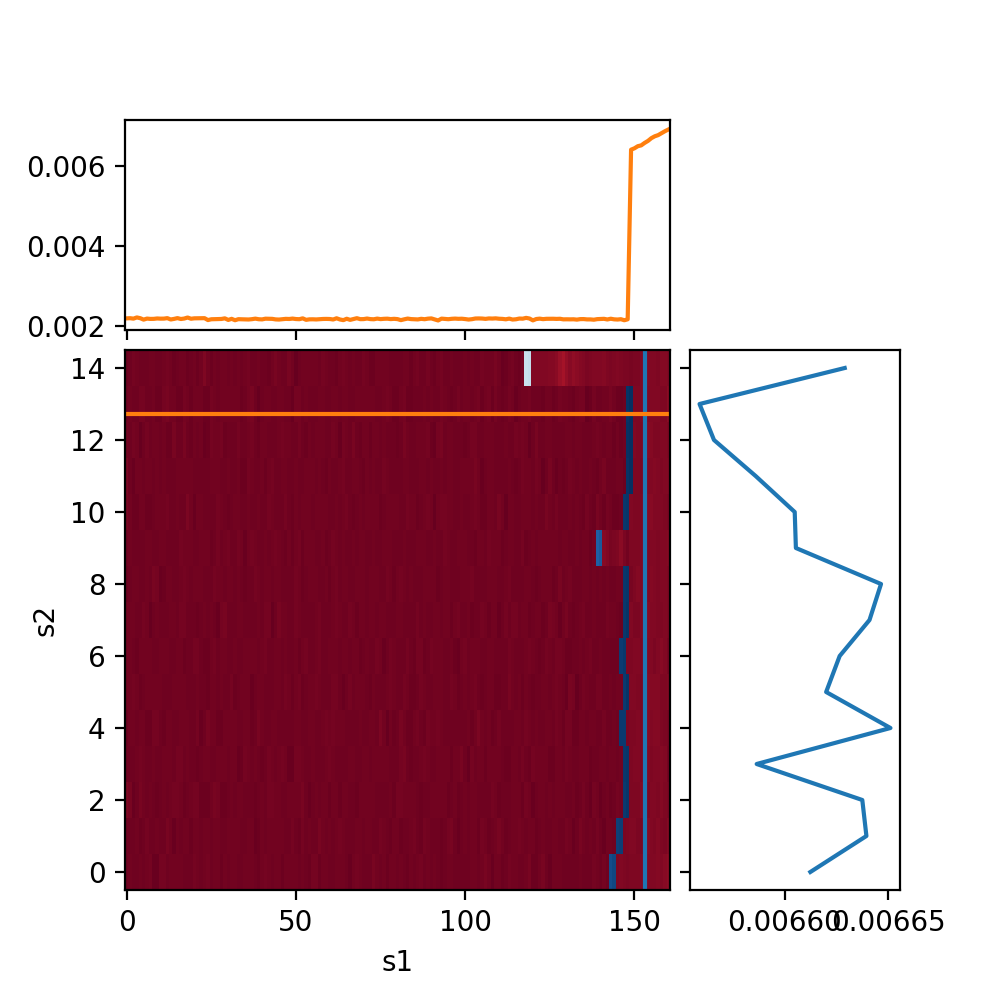

FloatRangeSlider(value=(0.00213189894, 0.00698955566), description='vlim', max=0.00698955566, min=0.0021318989…

Checkbox(value=False, description='Derivative')

In [172]:
ds = pd.read_csv('sample_data2.dat', sep='\t')
x,y,z = LockInX_ds(ds)
plot_2d(z,x,y)